<a href="https://colab.research.google.com/github/Aboubacar2012/ML_Project/blob/main/House_Prices_Advanced_Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Set up the environment 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Reading the datasets
train=pd.read_csv('/content/drive/MyDrive/ml_data/House_Prices_Advanced_regression/train.csv')
test=pd.read_csv('/content/drive/MyDrive/ml_data/House_Prices_Advanced_regression/test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.shape

(1460, 81)

######Data Cleaning
- Handling missing values

In [4]:
train.shape

(1460, 81)

In [5]:
train_blank=(train.isnull().sum())
train_blank.sort_values()

Id                  0
TotalBsmtSF         0
Heating             0
SaleCondition       0
CentralAir          0
                 ... 
FireplaceQu       690
Fence            1179
Alley            1369
MiscFeature      1406
PoolQC           1453
Length: 81, dtype: int64

In [6]:
#filter out 0 blank
train_blank=train_blank[train_blank>0]
train_blank.sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [7]:
# Percent null values
def miss_data(df):
    x = ['column_name','missing_data', 'missing_in_percentage']
    missing_data = pd.DataFrame(columns=x)
    columns = df.columns
    for col in columns:
        icolumn_name = col
        imissing_data = df[col].isnull().sum()
        imissing_in_percentage = (df[col].isnull().sum()/df[col].shape[0])*100

        missing_data.loc[len(missing_data)] = [icolumn_name, imissing_data, imissing_in_percentage]
    print(missing_data) 

In [8]:
train2=train.copy()

In [9]:
train2.drop(['PoolQC','MiscFeature','Alley','Fence'], axis=1, inplace=True)

In [10]:
train2_blank=(train2.isnull().sum())
train2_blank=train2_blank[train2_blank>0]
train2_blank.sort_values(ascending=False)

FireplaceQu     690
LotFrontage     259
GarageCond       81
GarageQual       81
GarageFinish     81
GarageYrBlt      81
GarageType       81
BsmtFinType2     38
BsmtExposure     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrArea        8
MasVnrType        8
Electrical        1
dtype: int64

In [11]:
train3=train2.copy()
train3.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [12]:
#Replacement 
replace_fireplacequ={'Gd':4,'TA':3,'Fa':2,'Ex':5,'Po':1}
train3=train3.replace({'FireplaceQu':replace_fireplacequ})

In [13]:
train3.FireplaceQu.value_counts()

4.0    380
3.0    313
2.0     33
5.0     24
1.0     20
Name: FireplaceQu, dtype: int64

In [14]:
train3['FireplaceQu']=train3['FireplaceQu'].replace(np.nan,0)

In [15]:
train3.FireplaceQu.value_counts()

0.0    690
4.0    380
3.0    313
2.0     33
5.0     24
1.0     20
Name: FireplaceQu, dtype: int64

In [16]:
train3_blank = (train3.isnull().sum())
train3_blank=train3_blank[train3_blank>0]
train3_blank.sort_values(ascending=False)

LotFrontage     259
GarageCond       81
GarageQual       81
GarageFinish     81
GarageYrBlt      81
GarageType       81
BsmtFinType2     38
BsmtExposure     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrArea        8
MasVnrType        8
Electrical        1
dtype: int64

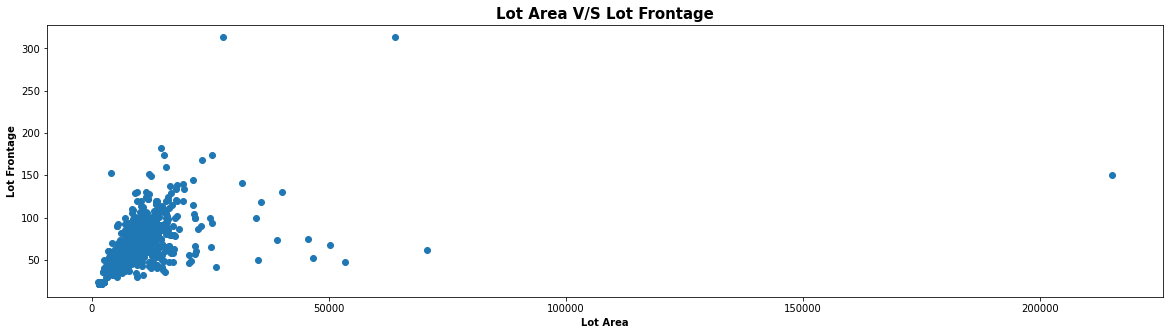

In [17]:
#Scatter plot Lot Area vs. Lot frontage
train4=train3.copy()
fig, ax=plt.subplots(figsize=(20,5))
plt.scatter(x=train4.LotArea, y=train4.LotFrontage)
plt.xlabel('Lot Area', fontweight='bold',fontsize=10)
plt.ylabel('Lot Frontage', fontweight='bold', fontsize=10)
plt.title('Lot Area V/S Lot Frontage', fontweight='bold', fontsize=15)
plt.show()

In [18]:
#train
train4.sort_values(by='LotArea', ascending=False).head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,314,20,RL,150.0,215245,Pave,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965,1965,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236,Rec,820,80,2136,GasW,TA,Y,SBrkr,2036,0,0,2036,2,0,2,0,3,1,TA,8,Typ,2,4.0,Attchd,1965.0,RFn,2,513,TA,TA,Y,0,0,0,0,0,0,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,IR1,HLS,AllPub,Corner,Sev,Timber,Norm,Norm,2fmCon,1.5Fin,5,6,1965,1965,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Gd,ALQ,1249,BLQ,147,103,1499,GasA,Ex,Y,SBrkr,1619,167,0,1786,2,0,2,0,3,1,TA,7,Typ,2,4.0,Attchd,1965.0,Fin,2,529,TA,TA,Y,670,0,0,0,0,0,700,8,2008,WD,Normal,228950
249,250,50,RL,NaN,159000,Pave,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697,Unf,0,747,1444,GasA,Gd,Y,SBrkr,1444,700,0,2144,0,1,2,0,4,1,Gd,7,Typ,2,3.0,Attchd,1958.0,Fin,2,389,TA,TA,Y,0,98,0,0,0,0,500,6,2007,WD,Normal,277000
706,707,20,RL,NaN,115149,Pave,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219,Unf,0,424,1643,GasA,TA,Y,SBrkr,1824,0,0,1824,1,0,2,0,2,1,Gd,5,Typ,2,3.0,Attchd,1971.0,Unf,2,739,TA,TA,Y,380,48,0,0,0,0,0,6,2007,WD,Normal,302000
451,452,20,RL,62.0,70761,Pave,IR1,Low,AllPub,Inside,Mod,ClearCr,Norm,Norm,1Fam,1Story,7,5,1975,1975,Gable,WdShngl,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,655,Unf,0,878,1533,GasA,TA,Y,SBrkr,1533,0,0,1533,1,0,2,0,2,1,Gd,5,Typ,2,3.0,Attchd,1975.0,Unf,2,576,TA,TA,Y,200,54,0,0,0,0,0,12,2006,WD,Normal,280000
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,4.0,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,0,1,2008,New,Partial,160000
1396,1397,20,RL,NaN,57200,Pave,IR1,Bnk,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,5,5,1948,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,353,Rec,334,60,747,GasA,TA,Y,SBrkr,1687,0,0,1687,1,0,1,0,3,1,TA,7,Min1,2,3.0,Detchd,1966.0,Unf,2,572,TA,TA,N,0,0,50,0,0,0,0,6,2010,WD,Normal,160000
769,770,60,RL,47.0,53504,Pave,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,Norm,Norm,1Fam,2Story,8,5,2003,2003,Hip,CompShg,CemntBd,Wd Shng,BrkFace,603.0,Ex,TA,PConc,Gd,TA,Gd,ALQ,1416,Unf,0,234,1650,GasA,Ex,Y,SBrkr,1690,1589,0,3279,1,0,3,1,4,1,Ex,12,Mod,1,4.0,BuiltIn,2003.0,Fin,3,841,TA,TA,Y,503,36,0,0,210,0,0,6,2010,WD,Normal,538000
457,458,20,RL,NaN,53227,Pave,IR1,Low,AllPub,CulDSac,Mod,ClearCr,Norm,Norm,1Fam,1Story,4,6,1954,1994,Flat,Tar&Grv,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,Gd,BLQ,1116,Unf,0,248,1364,GasA,Ex,Y,SBrkr,1663,0,0,1663,1,0,1,0,2,1,Gd,6,Min1,2,4.0,Attchd,1954.0,Fin,2,529,TA,TA,Y,224,137,0,0,0,0,0,3,2008,WD,Normal,256000
384,385,60,RL,NaN,53107,Pave,IR2,Low,AllPub,Corner,Mod,ClearCr,Feedr,Norm,1Fam,2Story,6,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,985,Unf,0,595,1580,GasA,Ex,Y,SBrkr,1079,874,0,1953,1,0,2,1,3,1,Gd,9,Typ,2,2.0,Attchd,1992.0,Fin,2,501,TA,TA,Y,216,231,0,0,0,0,0,6,2007,WD,Nor

In [19]:
train4[(train4.LotArea>=54000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697,Unf,0,747,1444,GasA,Gd,Y,SBrkr,1444,700,0,2144,0,1,2,0,4,1,Gd,7,Typ,2,3.0,Attchd,1958.0,Fin,2,389,TA,TA,Y,0,98,0,0,0,0,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965,1965,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236,Rec,820,80,2136,GasW,TA,Y,SBrkr,2036,0,0,2036,2,0,2,0,3,1,TA,8,Typ,2,4.0,Attchd,1965.0,RFn,2,513,TA,TA,Y,0,0,0,0,0,0,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,IR1,HLS,AllPub,Corner,Sev,Timber,Norm,Norm,2fmCon,1.5Fin,5,6,1965,1965,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Gd,ALQ,1249,BLQ,147,103,1499,GasA,Ex,Y,SBrkr,1619,167,0,1786,2,0,2,0,3,1,TA,7,Typ,2,4.0,Attchd,1965.0,Fin,2,529,TA,TA,Y,670,0,0,0,0,0,700,8,2008,WD,Normal,228950
451,452,20,RL,62.0,70761,Pave,IR1,Low,AllPub,Inside,Mod,ClearCr,Norm,Norm,1Fam,1Story,7,5,1975,1975,Gable,WdShngl,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,655,Unf,0,878,1533,GasA,TA,Y,SBrkr,1533,0,0,1533,1,0,2,0,2,1,Gd,5,Typ,2,3.0,Attchd,1975.0,Unf,2,576,TA,TA,Y,200,54,0,0,0,0,0,12,2006,WD,Normal,280000
706,707,20,RL,NaN,115149,Pave,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219,Unf,0,424,1643,GasA,TA,Y,SBrkr,1824,0,0,1824,1,0,2,0,2,1,Gd,5,Typ,2,3.0,Attchd,1971.0,Unf,2,739,TA,TA,Y,380,48,0,0,0,0,0,6,2007,WD,Normal,302000
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,4.0,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,0,1,2008,New,Partial,160000
1396,1397,20,RL,NaN,57200,Pave,IR1,Bnk,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,5,5,1948,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,353,Rec,334,60,747,GasA,TA,Y,SBrkr,1687,0,0,1687,1,0,1,0,3,1,TA,7,Min1,2,3.0,Detchd,1966.0,Unf,2,572,TA,TA,N,0,0,50,0,0,0,0,6,2010,WD,Normal,160000


In [20]:
train5=train4[~(train4.LotArea>=54000)]

In [21]:
train5=train4[~(train4.LotFrontage>=200)]

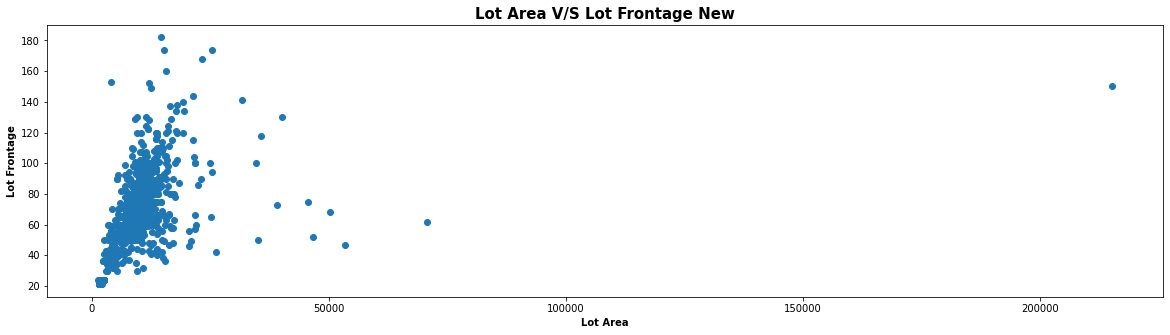

In [22]:
fig.ax=plt.subplots(figsize=(20,5))
plt.scatter(x=train5.LotArea, y=train5.LotFrontage)
plt.xlabel('Lot Area', fontweight='bold', fontsize=10)
plt.ylabel('Lot Frontage', fontweight='bold', fontsize=10)
plt.title('Lot Area V/S Lot Frontage New', fontweight='bold', fontsize=15)
plt.show()

In [23]:
train5.LotFrontage.isnull().sum()

259

In [24]:
train5.LotFrontage.dtypes

dtype('float64')

In [25]:
train5.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,0.0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,3.0,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500


In [26]:
train6=train5.copy()

In [27]:
#Fillna with mean using lambda function
train6['LotFrontage']=train6.groupby(['LotArea'])['LotFrontage'].apply(lambda x:x.fillna(x.mean()))

In [28]:
#Check again
train6.LotFrontage.isnull().sum()

220

In [29]:
train6['LotFrontage']=train6.groupby(['Neighborhood'])['LotFrontage'].apply(lambda x:x.fillna(x.median()))

In [30]:
train6.LotFrontage.isnull().sum()

0

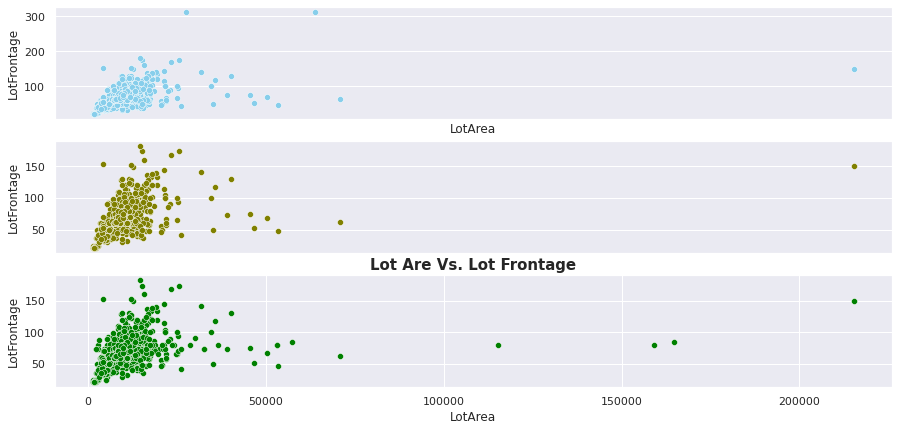

In [31]:
sns.set(style='darkgrid')
fig, (ax1, ax2, ax3)=plt.subplots(3, 1, figsize=(15, 7))
sns.scatterplot(x=train4.LotArea,
                y=train4.LotFrontage,
                color='skyblue', ax=ax1)
ax1.set_xticks([])

sns.scatterplot(x=train5.LotArea,
            y=train5.LotFrontage, 
            color='olive', ax=ax2)
ax2.set_xticks([])
ax2.set_xlabel('')

sns.scatterplot(x=train6.LotArea,
                y=train6.LotFrontage, 
                color='green', ax=ax3)
plt.title('Lot Are Vs. Lot Frontage', fontsize=15, fontweight='bold')
plt.show()

In [32]:
lot_area_40K = train6[(train6['LotArea'] >= 40000)]
print(lot_area_40K.isnull().sum().any())
print(lot_area_40K.shape)
print(train6.shape)

False
(13, 77)
(1458, 77)


In [33]:
train7 = train6[~(train6['LotArea'] >= 40000)]
train7_blank = (train7.isnull().sum())
train7_blank=train7_blank[train7_blank>0]
train7_blank.sort_values(ascending=False)

GarageCond      81
GarageQual      81
GarageFinish    81
GarageYrBlt     81
GarageType      81
BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrArea       8
MasVnrType       8
Electrical       1
dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


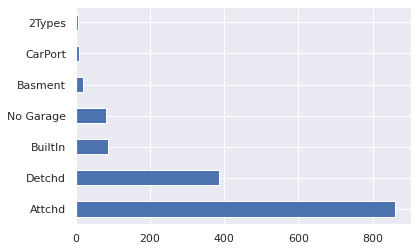

In [34]:
train7['GarageType'] = train7['GarageType'].replace(np.nan, 'No Garage')
train7.GarageType.value_counts().plot(kind='barh')
plt.show()

In [35]:
Types_2 = train7[(train7['GarageType'] == '2Types')]
Types_2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
129,130,20,RL,69.0,8973,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1958,1991,Gable,CompShg,Plywood,Plywood,BrkFace,85.0,TA,TA,CBlock,TA,TA,No,Rec,567,BLQ,28,413,1008,GasA,TA,Y,FuseA,1053,0,0,1053,0,1,1,1,3,1,Ex,6,Typ,0,0.0,2Types,1998.0,RFn,2,750,TA,TA,Y,0,80,0,180,0,0,0,7,2006,WD,Abnorml,150000
137,138,90,RL,82.0,11070,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,Duplex,1Story,7,5,1988,1989,Gable,CompShg,VinylSd,VinylSd,BrkFace,70.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1907,1907,GasA,Gd,Y,SBrkr,1959,0,0,1959,0,0,3,0,5,2,TA,9,Typ,0,0.0,2Types,1989.0,Unf,3,766,TA,TA,Y,0,0,0,0,0,0,0,7,2006,WD,Family,171000
676,677,70,RM,60.0,9600,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,2,1900,1950,Gable,CompShg,AsbShng,Stucco,None,0.0,TA,TA,BrkTil,TA,Fa,No,Unf,0,Unf,0,1095,1095,GasW,Fa,N,SBrkr,1095,679,0,1774,1,0,2,0,4,2,TA,8,Min2,0,0.0,2Types,1920.0,Unf,3,779,Fa,Fa,N,0,0,90,0,0,0,0,5,2006,WD,Normal,87000
913,914,90,RH,82.0,6270,Pave,Reg,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,Duplex,2Story,5,6,1949,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,284,Unf,0,717,1001,GasA,TA,N,FuseA,1001,1001,0,2002,0,0,2,0,4,2,TA,8,Typ,0,0.0,2Types,1949.0,Unf,3,871,TA,TA,Y,0,0,0,0,0,0,0,8,2007,WD,Normal,145000
1184,1185,20,RL,50.0,35133,Grvl,Reg,Lvl,AllPub,Inside,Mod,Timber,Norm,Norm,1Fam,1Story,5,4,1963,1963,Hip,CompShg,MetalSd,MetalSd,BrkFace,226.0,TA,TA,CBlock,TA,TA,Gd,Rec,1159,Unf,0,413,1572,GasA,Gd,Y,SBrkr,1572,0,0,1572,1,0,1,1,3,1,TA,5,Typ,2,3.0,2Types,1963.0,RFn,3,995,TA,TA,Y,0,263,0,0,263,0,0,5,2007,WD,Normal,186700
1190,1191,190,RL,73.0,32463,Pave,Reg,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,2fmCon,1Story,4,4,1961,1975,Gable,CompShg,MetalSd,MetalSd,Stone,149.0,TA,Gd,CBlock,TA,TA,Av,BLQ,1159,Unf,0,90,1249,GasA,Ex,Y,SBrkr,1622,0,0,1622,1,0,1,0,3,1,TA,7,Typ,1,3.0,2Types,1975.0,Fin,4,1356,TA,TA,Y,439,0,0,0,0,0,0,3,2007,WD,Normal,168000


In [36]:
train8 = train7[~(train7['GarageType'] == '2Types')]
train8_blank = (train8.isnull().sum())
train8_blank=train8_blank[train8_blank>0]
train8_blank.sort_values(ascending=False)

GarageCond      81
GarageQual      81
GarageFinish    81
GarageYrBlt     81
BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrArea       8
MasVnrType       8
Electrical       1
dtype: int64

In [37]:
train8.drop({'GarageFinish','GarageQual','GarageCond','GarageYrBlt'},axis=1, inplace=True)
print('Done')

Done


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [38]:
train9 = train8.copy()
train9.dropna(axis=0, inplace=True)
train9.isnull().sum().any()

False

In [39]:
train9.shape

(1391, 73)

######Data Filtering

In [40]:
train9.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000
mean,730.994249,56.840403,69.882122,9747.500359,6.134436,5.598131,1971.494608,1985.196262,104.051761,443.581596,47.429188,582.263839,1073.274623,1153.368081,349.547088,6.096334,1509.011503,0.427031,0.058950,1.555715,0.391086,2.862689,1.034508,6.500359,0.610352,1.836089,1.762761,471.216391,94.210640,46.642703,22.250899,3.319914,15.342200,2.550683,41.045291,6.316319,2007.814522,181539.550683
std,422.800909,42.201883,20.911530,4181.692988,1.349623,1.107319,30.409835,20.467863,180.409718,427.762112,163.009429,437.265234,376.225146,367.677664,435.885772,49.781820,507.277788,0.514777,0.241646,0.545374,0.505544,0.803219,0.194055,1.600753,0.635186,1.810566,0.742207,209.916616,122.139604,65.379333,61.567191,29.270023,56.235202,39.116172,498.092243,2.707413,1.328207,78424.891038
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,105.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.500000,20.000000,60.000000,7537.500000,5.000000,5.000000,1954.000000,1968.000000,0.000000,0.000000,0.000000,249.000000,806.500000,878.000000,0.000000,0.000000,1131.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,0.000000,1.000000,326.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130750.000000
50%,730.000000,50.000000,70.000000,9450.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,392.000000,0.000000,495.000000,996.000000,1080.000000,0.000000,0.000000,1456.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,2.000000,478.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163990.000000
75%,1099.500000,70.000000,80.000000,11489.000000,7.000000,6.000000,2001.000000,2004.000000,168.000000,712.000000,0.000000,813.500000,1297.500000,1379.500000,729.000000,0.000000,1768.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,4.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,182.000000,39104.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2188.000000,1474.000000,2336.000000,3200.000000,3228.000000,2065.000000,572.000000,4476.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,5.000000,4.000000,1390.000000,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [41]:
train.describe(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [42]:
train10 = train9.copy()
train10['Age']=train10['YrSold']-train10['YearBuilt']
train10.drop({'MiscVal','MoSold','YrSold'}, axis=1, inplace=True)

In [43]:
object_cols = [col for col in train10.columns if train10[col].dtype == "object"]
train10_OBJ = train10[object_cols]
train10_OBJ.shape

(1391, 35)

In [44]:
object_nunique = list(map(lambda col: train10[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('Street', 2),
 ('Utilities', 2),
 ('CentralAir', 2),
 ('LandSlope', 3),
 ('PavedDrive', 3),
 ('LotShape', 4),
 ('LandContour', 4),
 ('MasVnrType', 4),
 ('ExterQual', 4),
 ('BsmtQual', 4),
 ('BsmtCond', 4),
 ('BsmtExposure', 4),
 ('Heating', 4),
 ('KitchenQual', 4),
 ('MSZoning', 5),
 ('LotConfig', 5),
 ('BldgType', 5),
 ('ExterCond', 5),
 ('Foundation', 5),
 ('HeatingQC', 5),
 ('Electrical', 5),
 ('RoofStyle', 6),
 ('BsmtFinType1', 6),
 ('BsmtFinType2', 6),
 ('GarageType', 6),
 ('SaleCondition', 6),
 ('RoofMatl', 7),
 ('Functional', 7),
 ('Condition2', 8),
 ('HouseStyle', 8),
 ('Condition1', 9),
 ('SaleType', 9),
 ('Exterior1st', 14),
 ('Exterior2nd', 16),
 ('Neighborhood', 25)]

In [45]:
train11  = pd.get_dummies(train10, drop_first = True)
train11.isnull().sum().any()

False

In [46]:
X = train11.drop({'Id','SalePrice'},axis = 1 )
y=train11.SalePrice

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.35, random_state=21)

In [48]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold,cross_val_predict
from sklearn.model_selection import RepeatedStratifiedKFold

###### Model 

- 1. Random Forest Regressor 

In [49]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_train,y_train)
val_preds = rf_model.predict(X_valid)
rf_val_mae = mean_absolute_error(val_preds, y_valid)

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae)) 

Validation MAE for Random Forest Model: 18014.775086535643


In [50]:
rf_model_2 = RandomForestRegressor(n_estimators = 200,criterion='mse',max_features='sqrt')
rf_model_2_val_preds = cross_val_predict(rf_model_2,X,y, cv=7)
rf_model_2_val_mae = mean_absolute_error(rf_model_2_val_preds, y)
print("Validation MAE for Random Forest Model: {}".format(rf_model_2_val_mae))

Validation MAE for Random Forest Model: 16452.426471962615


- 2. XGB Regressor 

In [51]:
import xgboost as xgb
xgbr = xgb.XGBRegressor(verbosity=0,n_estimators=200) 

In [52]:
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)

In [53]:
ypred = xgbr.predict(X_valid)
mae = mean_absolute_error(y_valid, ypred)
print("MAE: %.2f" % mae)

MAE: 15945.83


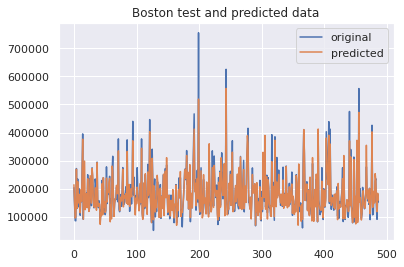

In [54]:
x_ax = range(len(y_valid))
plt.plot(x_ax, y_valid, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Boston test and predicted data")
plt.legend()
plt.show()

In [55]:
cols = [col for col in train10.columns ]
unwanted_col = {'SalePrice','Age'}
filter_cols = [ele for ele in cols if ele not in unwanted_col]

In [56]:
test=test[filter_cols]
test.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1.0,730.0,Y,140,0,0,0,120,0,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1.0,312.0,Y,393,36,0,0,0,0,WD,Normal


##### Categorical column encoding

In [57]:
#object_cols = [col for col in train10.columns if train10[col].dtype == "object"]

good_label_cols = [col for col in object_cols if 
                   set(train10[col]).issubset(set(test[col]))]
        
# Problematic columns that will be dropped from the dataset
bad_label_cols = list(set(object_cols)-set(good_label_cols))
        
print('Categorical columns that ordinal encoded:', good_label_cols)
print('\nCategorical columns that will be dropped from the dataset:', bad_label_cols)

Categorical columns that ordinal encoded: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'RoofStyle', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']

Categorical columns that will be dropped from the dataset: ['GarageType', 'HouseStyle', 'Utilities', 'Heating', 'Condition2', 'Electrical', 'RoofMatl', 'Exterior1st', 'Exterior2nd']


In [58]:
test = test.replace(np.nan, 0)

In [59]:
object_nunique_train = list(map(lambda col: train10[col].nunique(), good_label_cols))
train_d = dict(zip(good_label_cols, object_nunique_train))
train_d2 = pd.DataFrame.from_dict(train_d,orient='index')
train_d2.rename(columns={0: "train"}, inplace=True)
train_d2.head()

,train
MSZoning,5
Street,2
LotShape,4
LandContour,4
LotConfig,5


In [60]:
object_nunique_test = list(map(lambda col: test[col].nunique(), good_label_cols))
test_d = dict(zip(good_label_cols, object_nunique_test))
test_d2 = pd.DataFrame.from_dict(test_d,orient='index')
test_d2.rename(columns={0: "test"}, inplace=True)
test_d2.head()

,test
MSZoning,6
Street,2
LotShape,4
LandContour,4
LotConfig,5


In [61]:
cat_col = pd.concat([train_d2, test_d2],axis=1)
cat_col['diff']=cat_col['train']-cat_col['test']
bad_cat_col = cat_col.loc[cat_col['diff'] != 0]
bad_cat_col = bad_cat_col.index.tolist()
bad_cat_col

['MSZoning',
 'MasVnrType',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'KitchenQual',
 'Functional',
 'SaleType']

In [62]:
final_cat_col = [x for x in good_label_cols if x not in bad_cat_col]

In [63]:
final_remove = bad_label_cols + list(set(bad_cat_col) - set(bad_label_cols))

In [64]:
all_cols = [col for col in train10.columns]

unwanted_col = {'Id','SalePrice','Age'}
filter_cols_final = [ele for ele in all_cols if ele not in unwanted_col]
final_col = [ele for ele in filter_cols_final if ele not in final_remove]

In [65]:
train13 = train10[final_col]
train13.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'SaleCondition'],
      dtype='object')

In [66]:
test3 = test[final_col]

In [67]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(train13)
train13 = enc.transform(train13)
test3 = enc.transform(test3)

In [68]:
X_final = train13
y_final = train11.SalePrice

In [69]:
X_train_f, X_valid_f, y_train_f, y_valid_f = train_test_split(X_final, y_final, test_size=0.35, random_state=21)

In [70]:
rf_model_final = RandomForestRegressor(n_estimators = 200,criterion='mse',max_features='sqrt')
rf_model_final = rf_model_final.fit(X_train_f,y_train_f)
val_preds_final = rf_model_final.predict(X_valid_f)
rf_val_mae_final = mean_absolute_error(val_preds_final, y_valid_f)

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae_final))

Validation MAE for Random Forest Model: 26414.64712525667


##### XGB Regressor With GridSearch CV 

In [71]:
xgb1 = xgb.XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07],
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': range(0,500,100)}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 7,
                        n_jobs = 5,
                        verbose=True)

In [72]:
xgb_grid.fit(X_valid_f,y_valid_f)

Fitting 7 folds for each of 45 candidates, totalling 315 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  1.2min
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  7.3min
[Parallel(n_jobs=5)]: Done 315 out of 315 | elapsed: 12.9min finished


GridSearchCV(cv=7, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_...
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7], 'min_child_weight': [4],
                         'n_estim

#####Final Prediction & Submission

In [73]:
model =  xgb_grid.best_estimator_
final_predict = xgb_grid.best_estimator_.predict(test3)
submission = pd.DataFrame({
        "Id": test["Id"],
        "SalePrice": final_predict
    })

submission.to_csv('submission.csv', index=False)

In [74]:
submission.shape

(1459, 2)